In [1]:
import numpy as np
import qiskit as qk
from qiskit import *
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram
%matplotlib inline


Let $$\textbf{A} = \begin{bmatrix} a_{11} &a_{12}  \\ a_{21} & a_{22}   \end{bmatrix}$$
and let A be Hermitian. 

Decompose A in terms of Pauli Matrices:
$$\textbf{A}  = \frac{a_{11}+a_{22}}{2}\textbf{I}+a_{12}\textbf{X}+\frac{a_{11}-a_{22}}{2}\textbf{Z}$$
The most general normalized 2D real vector is given by:
$$| \chi(\lambda)\rangle = \cos{\lambda}|0\rangle+\sin{\lambda}|1\rangle$$

Then to find the expectation value of $\textbf{A}$, we average over many experiments:

$$\langle \textbf{A} \rangle = \frac{a_{11}+a_{22}}{2}+a_{12}\langle \textbf{X} \rangle+ \frac{a_{11}-a_{22}}{2}\langle\textbf{Z}\rangle$$

In [48]:

def expectationValue(A, theta, shots=1024):
    backend = Aer.get_backend('qasm_simulator')
    xvqe = QuantumCircuit(1,1)
    xvqe.ry(2*theta,0)
    xvqe.h(0)
    xvqe.measure(0,0)
    
    
    zvqe = QuantumCircuit(1,1)
    zvqe.ry(2*theta,0)
    zvqe.measure(0,0)
    
    
    xJob = execute(xvqe, backend, shots=shots)
    xRes = xJob.result()
    xCounts = xRes.get_counts(xvqe)
   
    if '0' not in xCounts:
        xCounts['0'] = 0 
    if '1' not in xCounts:
        xCounts['1'] = 0 
    xExp = xCounts['0']/shots - xCounts['1']/shots 
    
    zJob = execute(zvqe, backend, shots=shots)
    zRes = zJob.result()
    zCounts = zRes.get_counts(zvqe)
    
    if '0' not in zCounts:
        zCounts['0'] = 0 
    if '1' not in zCounts:
        zCounts['1'] = 0 
    zExp = zCounts['0']/shots - zCounts['1']/shots
    
    return (A[0][0] + A[1][1])/2 + A[0][1]*xExp + (A[0][0] - A[1][1])/2 * zExp

In [51]:
A = np.array([[18,2], [12, -5]])
print(min(np.linalg.eig(A)[0]))


-6.0


In [58]:
theta  = np.linspace(0, 2*np.pi, int(1e4))
nshots = 4096

-5.30517578125


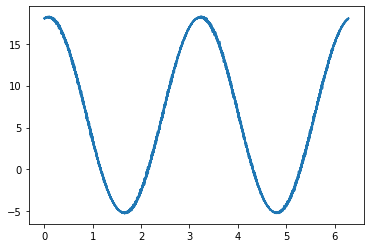

In [59]:
exval = lambda theta : expectationValue(A, theta, shots = nshots)
expvals = np.vectorize(exval)(theta)
print(min(expvals))
plt.plot(theta,expvals)